##TITANIC SURVIVAL PREDICTION


This project utilizes the Titanic dataset to predict whether a passenger survived the sinking of the RMS Titanic, a classic beginner’s machine learning problem. The dataset includes various features such as passenger class, age, gender, fare, cabin, and embarkation port, which are used to train models to predict survival. By processing and analyzing these features, we can explore data cleaning techniques, handle missing values, and apply different machine learning algorithms like decision trees and logistic regression to make survival predictions. This project is an ideal way to learn fundamental data science and machine learning skills while tackling a real-world problem

#1. Importing the library files

In [ ]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.model_selection import train_test_split
 from sklearn import metrics
 from sklearn.svm import SVC
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.linear_model import LogisticRegression
 from sklearn.tree import DecisionTreeClassifier

# 2. Reading the Titanic Dataset

In [ ]:
data = pd.read_csv("/content/Titanic-Dataset.csv")

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#First 5 rows of the dataset

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Last 5 rows of the dataset

In [ ]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#Thorough exploration of the dataset
Vewing the Columns in the dataset

In [ ]:
col = data.columns
print(col)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


#Bar Plot for Survival Count

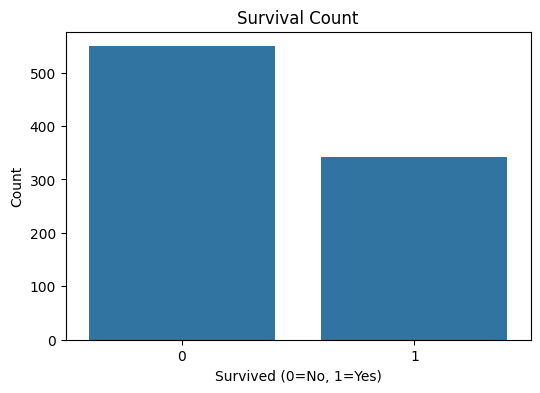

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

Shape of the dataset


In [ ]:
print(data.shape)

(891, 12)


#3. Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Checking for missing data before preprocessing


In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Combine Parch and SibSp into a new feature called 'FamilySize'

In [ ]:
data['FamilySize'] = data['Parch'] + data['SibSp']
data.drop(['Parch', 'SibSp'], axis=1, inplace=True)

# Replace missing values by using appropriate techniques


In [ ]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

In [ ]:
distinct_embarked = data['Embarked'].unique()
print(distinct_embarked)

['S' 'C' 'Q' nan]


#Generalisation


In [ ]:
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(data['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


In [ ]:
title_mapping = {
    'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Dr': 4,
    'Rev': 5, 'Col': 6, 'Major': 6, 'Mlle': 1, 'Ms': 1,
    'Lady': 7, 'Countess': 7, 'Jonkheer': 7, 'Don': 7,
    'Sir': 7, 'Mme': 2, 'Capt': 6, 'Other': 7
}

data['Title'] = data['Title'].map(title_mapping)

data['Title'] = data['Title'].fillna(7)

print(data[['Name', 'Title']].head())

                                                Name  Title
0                            Braund, Mr. Owen Harris      0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      2
2                             Heikkinen, Miss. Laina      1
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      2
4                           Allen, Mr. William Henry      0


# Feature engineering

In [ ]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Embarked'] = data['Embarked'].astype('category').cat.codes

data['IsAlone'] = (data['FamilySize'] == 1).astype(int)

data['HasCabin'] = data['Cabin'].notnull().astype(int)

title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Dr': 4, 'Rev': 5, 'Other': 6}

data['Pclass_Fare'] = data['Pclass'] * data['Fare']
data['Age_Fare'] = data['Age'] * data['Fare']

In [ ]:
data['Cabin_Category'] = data['Cabin'].apply(lambda x: 'U' if pd.isnull(x) else 'Known')

# Fill missing cabins with 'U' and extract the first letter as the deck
data['Deck'] = data['Cabin'].fillna('U').apply(lambda x: x[0])

# Map cabin decks to numerical values
deck_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8, 'U': 0}
data['Deck'] = data['Deck'].map(deck_mapping)

# Example: Fill missing cabins with the most common value ('U' for unknown)
data['Cabin'] = data['Cabin'].fillna('U')

# Verify the changes
print(data[['Cabin', 'Cabin_Category', 'Deck']].head())


  Cabin Cabin_Category  Deck
0     U              U     0
1   C85          Known     3
2     U              U     0
3  C123          Known     3
4     U              U     0


# Distribution of Age

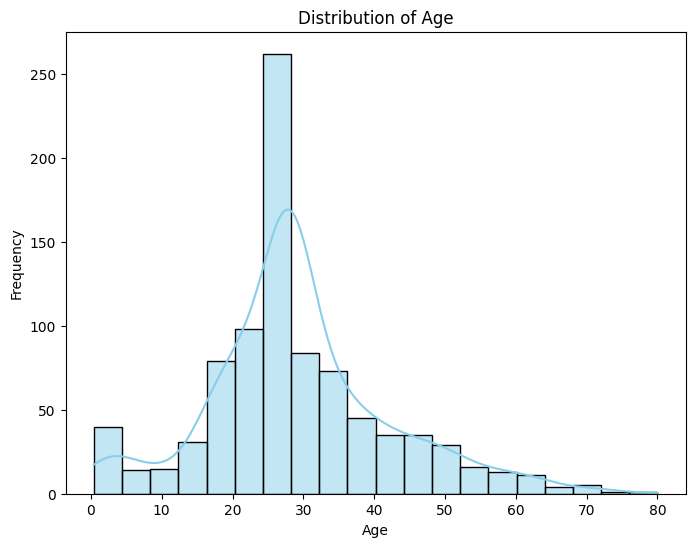

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# Distribution of Fare

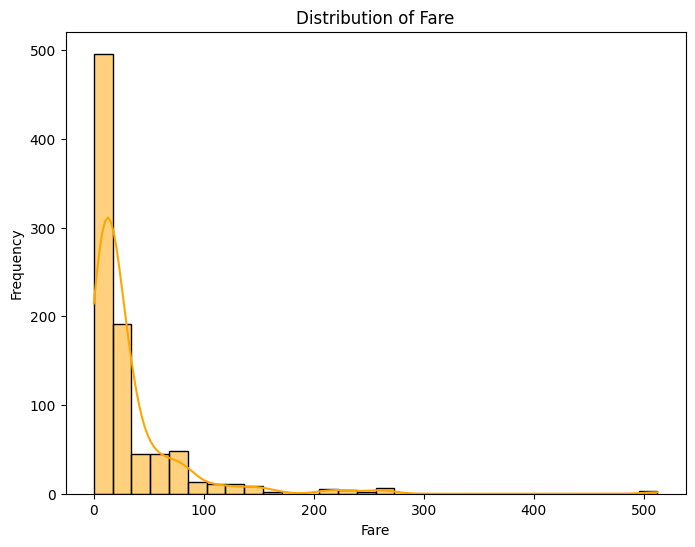

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Fare'], bins=30, kde=True, color='orange')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


# Distribution of Sex (Gender)

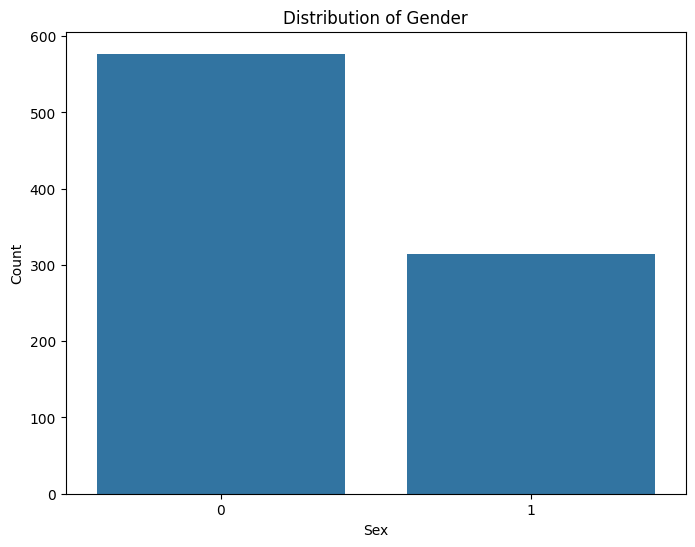

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sex')
plt.title('Distribution of Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Distribution of Pclass (Passenger Class)

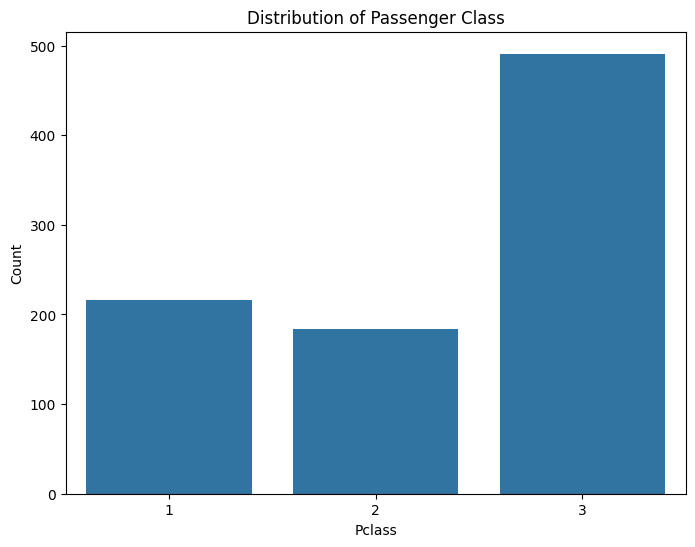

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Pclass')
plt.title('Distribution of Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# Distribution of Embarked (Ports)

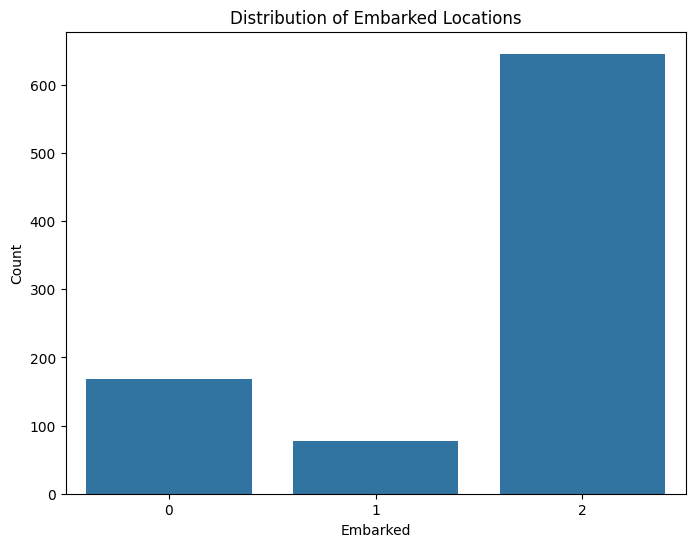

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Embarked')
plt.title('Distribution of Embarked Locations')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()


#Survival Rate by Age and Sex (Scatter Plot with Hue)

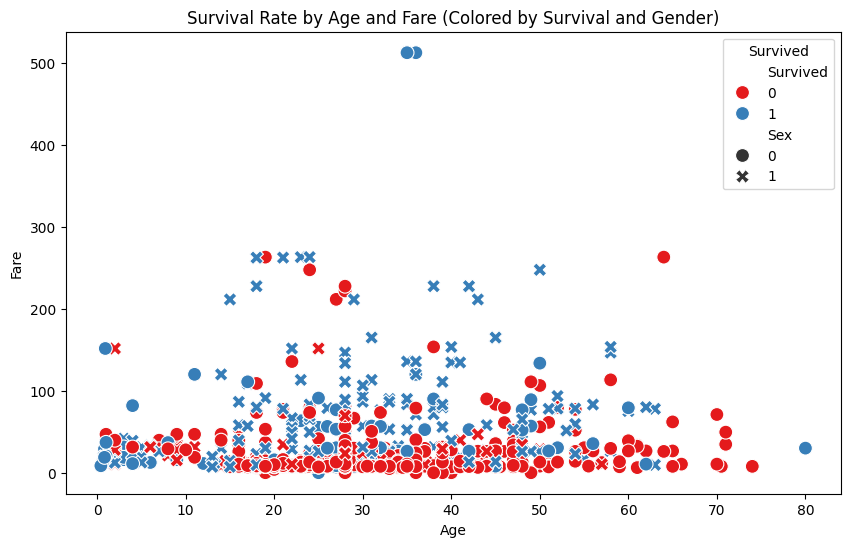

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Fare', hue='Survived', palette='Set1', style='Sex', s=100)
plt.title('Survival Rate by Age and Fare (Colored by Survival and Gender)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', loc='upper right')
plt.show()


# Survival rate by Gender

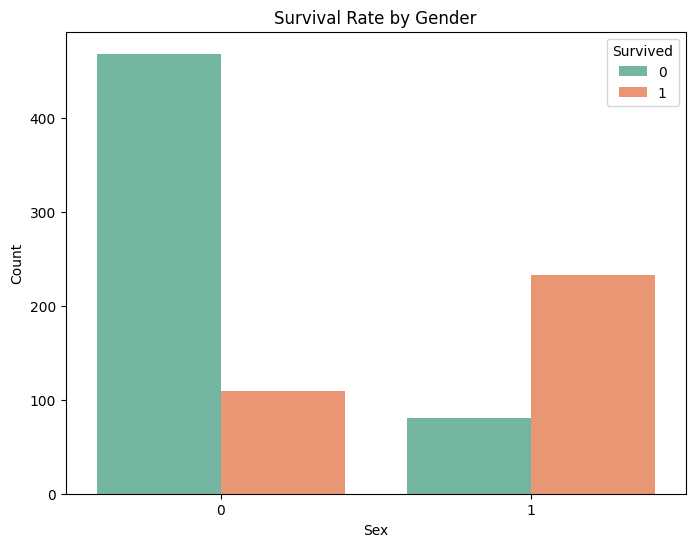

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sex', hue='Survived', palette='Set2')
plt.title('Survival Rate by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


# Drop the 'Ticket' column in-place

In [ ]:
data.drop('Ticket', axis=1, inplace=True)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,FamilySize,Title,IsAlone,HasCabin,Pclass_Fare,Age_Fare,Cabin_Category,Deck
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,U,2,1,0,1,0,21.7500,159.5000,U,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,C85,0,1,2,1,1,71.2833,2708.7654,Known,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,U,2,0,1,0,0,23.7750,206.0500,U,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,C123,2,1,2,1,1,53.1000,1858.5000,Known,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,U,2,0,0,0,0,24.1500,281.7500,U,0


#Converting Chategorical Values to numerical Values

In [ ]:
from sklearn import preprocessing
label_encoders = {}
categorical_columns = ["Sex", "Name", "Cabin", "Embarked", "Title", "Cabin_Category"]

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    le = preprocessing.LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))

#Heatmap for Correlation:

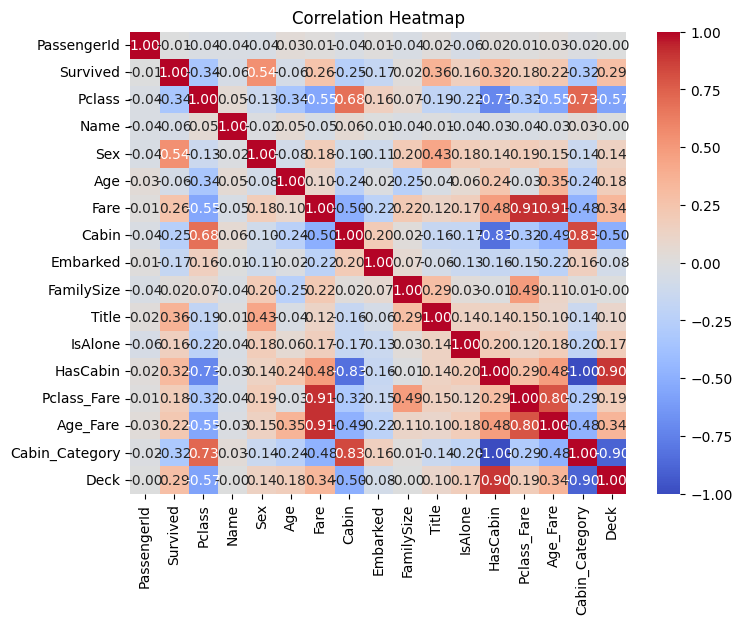

In [ ]:
plt.figure(figsize=(8,6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Checking for missing data after preprocessing


In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
Fare,0
Cabin,0
Embarked,0
FamilySize,0


# Extract titles from Name column

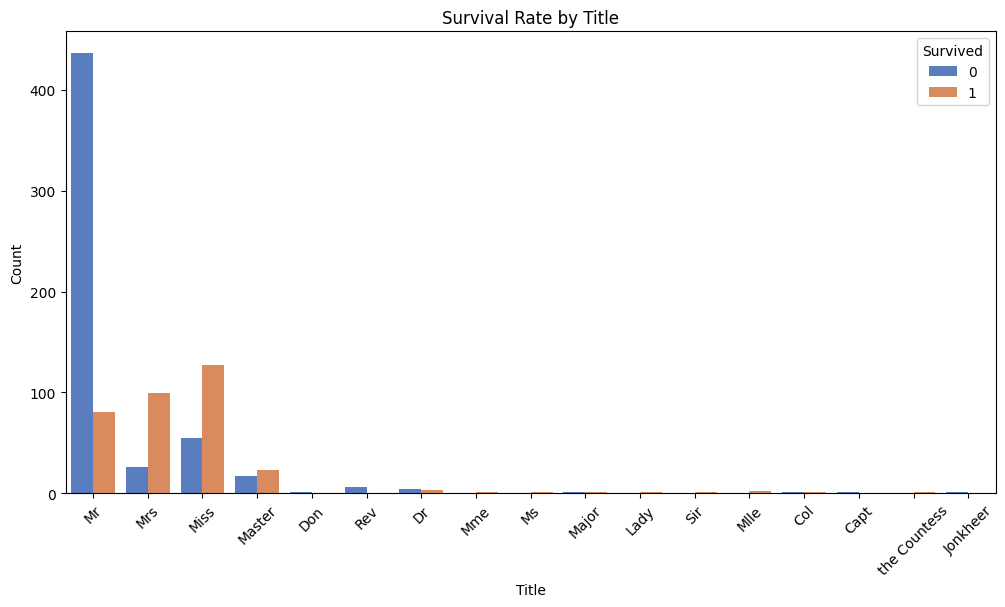

In [ ]:
data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Plot survival by title
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Title', hue='Survived', palette='muted')
plt.title('Survival Rate by Title')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#Finding the Correlation between each feature

In [ ]:
corr = data.corr()
corr

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,FamilySize,Title,IsAlone,HasCabin,Pclass_Fare,Age_Fare,Cabin_Category,Deck
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,-0.042939,0.034212,0.012658,-0.035077,0.013128,-0.040143,0.016682,-0.060548,0.019919,0.006040,0.028419,-0.019919,-0.000483
Survived,-0.005007,1.000000,-0.338481,-0.057343,0.543351,-0.064910,0.257307,-0.254888,-0.167675,0.016639,0.361340,0.163157,0.316912,0.183627,0.222430,-0.316912,0.287944
Pclass,-0.035144,-0.338481,1.000000,0.052831,-0.131900,-0.339898,-0.549500,0.684121,0.162098,0.065997,-0.192930,-0.218844,-0.725541,-0.318083,-0.554203,0.725541,-0.570691
Name,-0.038559,-0.057343,0.052831,1.000000,-0.020314,0.048252,-0.049173,0.061959,-0.006117,-0.036309,-0.013482,-0.043582,-0.033960,-0.043170,-0.026516,0.033960,-0.001737
Sex,-0.042939,0.543351,-0.131900,-0.020314,1.000000,-0.081163,0.182333,-0.096681,-0.108262,0.200988,0.432911,0.184774,0.140391,0.186584,0.146391,-0.140391,0.143517
Age,0.034212,-0.064910,-0.339898,0.048252,-0.081163,1.000000,0.096688,-0.240839,-0.018754,-0.245619,-0.040580,0.056536,0.240314,-0.028538,0.354382,-0.240314,0.175895
Fare,0.012658,0.257307,-0.549500,-0.049173,0.182333,0.096688,1.000000,-0.503355,-0.224719,0.217138,0.122465,0.167272,0.482075,0.909188,0.912189,-0.482075,0.337525
Cabin,-0.035077,-0.254888,0.684121,0.061959,-0.096681,-0.240839,-0.503355,1.000000,0.202520,0.015644,-0.158139,-0.165015,-0.828558,-0.320301,-0.491923,0.828558,-0.504618
Embarked,0.013128,-0.167675,0.162098,-0.006117,-0.108262,-0.018754,-0.224719,0.202520,1.000000,0.066516,-0.064101,-0.134119,-0.160196,-0.147236,-0.224410,0.160196,-0.080523
FamilySize,-0.040143,0.016639,0.065997,-0.036309,0.200988,-0.245619,0.217138,0.015644,0.066516,1.000000,0.291728,0.027783,-0.009175,0.486379,0.114912,0.009175,-0.003057


# Extract first letter from Cabin and create a new feature 'Cabin_Letter'

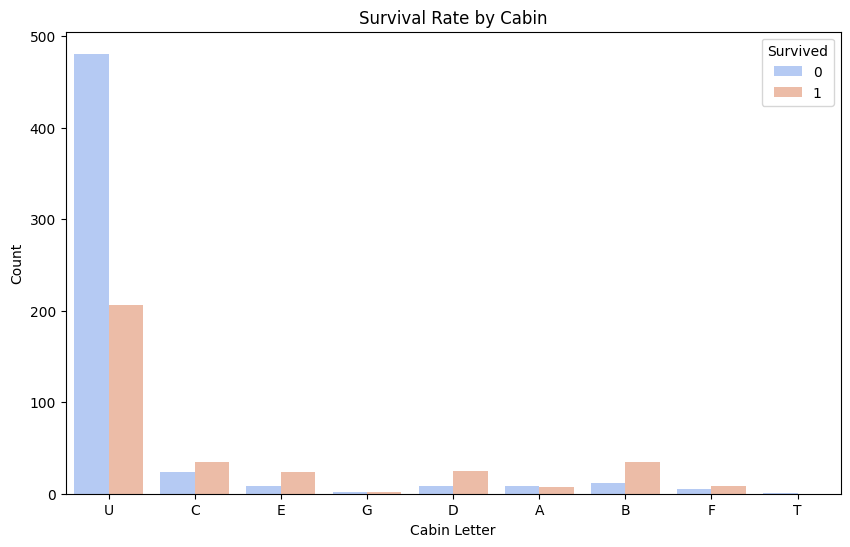

In [ ]:
data['Cabin_Letter'] = data['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'Unknown')

# Plot survival by cabin letter
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Cabin_Letter', hue='Survived', palette='coolwarm')
plt.title('Survival Rate by Cabin')
plt.xlabel('Cabin Letter')
plt.ylabel('Count')
plt.show()


#Removing the Columns which has less realation with Class Label

In [ ]:
low_correlation_threshold = 0.05
correlation_matrix = data.corr()

correlation_with_survived = correlation_matrix['Survived'].abs()

columns_to_keep = correlation_with_survived[correlation_with_survived >= low_correlation_threshold].index

# Drop columns with correlation below the threshold
data = data[columns_to_keep]

print("Filtered Columns):")
col = data.columns
print(col)

Filtered Columns):
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'Title', 'IsAlone', 'HasCabin', 'Pclass_Fare', 'Age_Fare',
       'Cabin_Category', 'Deck'],
      dtype='object')


#Boxplot for Fare by Survival

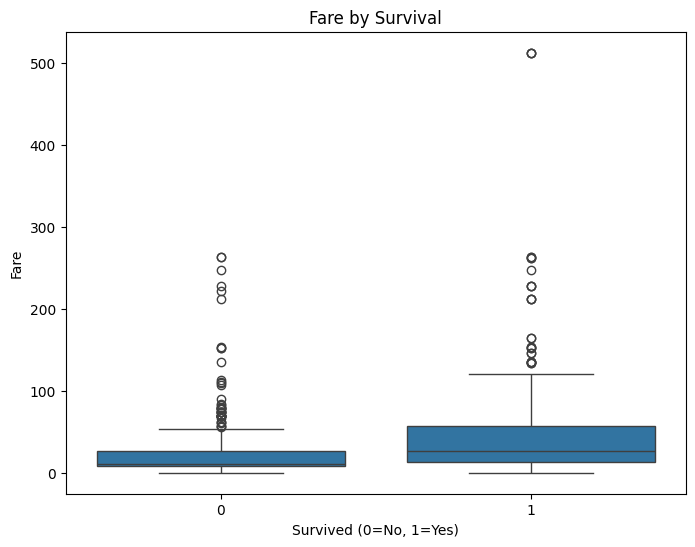

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title('Fare by Survival')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Fare')
plt.show()

# Display the updated DataFrame

In [ ]:
col = data.columns
print(col)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'Title', 'IsAlone', 'HasCabin', 'Pclass_Fare', 'Age_Fare',
       'Cabin_Category', 'Deck'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


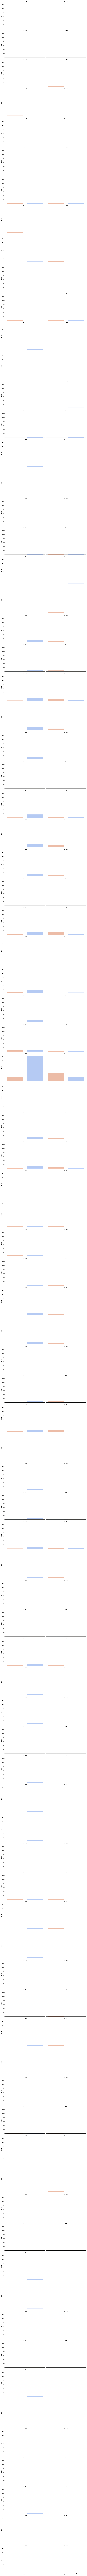

In [ ]:
# Create survival by age group and sex (FacetGrid)
g = sns.FacetGrid(data, col='Sex', row='Age', hue='Survived', palette='coolwarm', height=4, aspect=1.5)
g.map(sns.countplot, 'Survived')
g.set_axis_labels('Survival', 'Count')
g.set_titles("{col_name} - {row_name}")
plt.show()


In [ ]:
data.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Title,IsAlone,HasCabin,Pclass_Fare,Age_Fare,Cabin_Category,Deck
0,0,3,108,0,22.0,7.2500,147,2,0,1,0,21.7500,159.5000,1,0
1,1,1,190,1,38.0,71.2833,81,0,2,1,1,71.2833,2708.7654,0,3
2,1,3,353,1,26.0,7.9250,147,2,1,0,0,23.7750,206.0500,1,0
3,1,1,272,1,35.0,53.1000,55,2,2,1,1,53.1000,1858.5000,0,3
4,0,3,15,0,35.0,8.0500,147,2,0,0,0,24.1500,281.7500,1,0


#4. Splitting the data

In [ ]:
X = data.drop(columns=['Survived'])
y = data['Survived']


# Print the shapes of X and y to confirm the split

In [ ]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (891, 14)
y shape: (891,)


In [ ]:
X

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Title,IsAlone,HasCabin,Pclass_Fare,Age_Fare,Cabin_Category,Deck
0,3,108,0,22.0,7.2500,147,2,0,1,0,21.7500,159.5000,1,0
1,1,190,1,38.0,71.2833,81,0,2,1,1,71.2833,2708.7654,0,3
2,3,353,1,26.0,7.9250,147,2,1,0,0,23.7750,206.0500,1,0
3,1,272,1,35.0,53.1000,55,2,2,1,1,53.1000,1858.5000,0,3
4,3,15,0,35.0,8.0500,147,2,0,0,0,24.1500,281.7500,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,548,0,27.0,13.0000,147,2,5,0,0,26.0000,351.0000,1,0
887,1,303,1,19.0,30.0000,30,2,1,0,1,30.0000,570.0000,0,2
888,3,413,1,28.0,23.4500,147,2,1,0,0,70.3500,656.6000,1,0
889,1,81,0,26.0,30.0000,60,0,0,0,1,30.0000,780.0000,0,3


In [ ]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


#Splitting into Training and Testing sets and balance the class labels

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the original class distribution in the training set
print("Original class distribution in y_train:")
print(y_train.value_counts())

# Handle class imbalance in the training set with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display the resampled class distribution in the training set
print("\nResampled class distribution in y_train_resampled:")
print(y_train_resampled.value_counts())


Original class distribution in y_train:
Survived
0    444
1    268
Name: count, dtype: int64

Resampled class distribution in y_train_resampled:
Survived
0    444
1    444
Name: count, dtype: int64



# Check class distribution before and after resampling


In [ ]:
# Display the shapes of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training features shape: (712, 14)
Testing features shape: (179, 14)
Training labels shape: (712,)
Testing labels shape: (179,)


In [ ]:
print("Original class distribution:", y_train.value_counts())
print("Resampled class distribution:", pd.Series(y_train_resampled).value_counts())

Original class distribution: Survived
0    444
1    268
Name: count, dtype: int64
Resampled class distribution: Survived
0    444
1    444
Name: count, dtype: int64


#5. Building The Models

#A. Implimentation of Logistic Regression and analysing the perfomance

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    C=10,
    max_iter=200,
    penalty='l2',
    solver='saga',
    tol=0.0001,
    random_state=1234
)

logreg.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10, max_iter=200, random_state=1234, solver='saga')

In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
 cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
 cnf_matrix

array([[87, 18],
       [18, 56]])

In [ ]:
 from sklearn.metrics import classification_report
 print("\nClassification Report of Logistic Regression:\n",metrics.classification_report(y_test, y_pred))
 print ("---------------------------------------------------------------------")


Classification Report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

---------------------------------------------------------------------


In [ ]:
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,y_pred))
print ("-------------------------------------------------------------------")

Accuracy of the classifer is 0.80
-------------------------------------------------------------------


#B. Implimentation of Decision Tree Classifier and analysing the perfomance

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dtc = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=5,
    random_state=42
)

# Fit the model to the training data
dtc.fit(X_train, y_train)

# Predict on the test data
y_pred = dtc.predict(X_test)

In [ ]:
y_pred = grid_search_dt.predict(X_test)

In [ ]:
 from sklearn import metrics
 cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
 cnf_matrix

array([[92, 13],
       [19, 55]])

In [ ]:
print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred))
print ("---------------------------------------------------------------------")


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

---------------------------------------------------------------------


In [ ]:
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,y_pred))
print ("-------------------------------------------------------------------")

Accuracy of the classifer is 0.82
-------------------------------------------------------------------


##Visualize the model


Visualize the Decision Tree on Training Data

In [ ]:
from sklearn import tree
text_representation = tree.export_text(dtc)
print(text_representation)

|--- feature_0 <= 2.50
|   |--- feature_3 <= 17.50
|   |   |--- feature_11 <= 162.00
|   |   |   |--- class: 1
|   |   |--- feature_11 >  162.00
|   |   |   |--- feature_10 <= 52.25
|   |   |   |   |--- class: 0
|   |   |   |--- feature_10 >  52.25
|   |   |   |   |--- feature_13 <= 2.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_13 >  2.50
|   |   |   |   |   |--- class: 1
|   |--- feature_3 >  17.50
|   |   |--- feature_11 <= 335.40
|   |   |   |--- feature_4 <= 13.40
|   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |--- feature_3 <= 20.00
|   |   |   |   |   |   |--- feature_10 <= 22.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_10 >  22.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_3 >  20.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  13.40
|   |   |   |   |--- class: 1
|   |   |--- featur

In [ ]:
with open("decistion_tree_train.log", "w") as fout:
 fout.write(text_representation)

# Specify feature names as a list

In [ ]:
print(np.unique(y_train))


[0 1]


In [ ]:
feature_names = ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'Title', 'IsAlone', 'HasCabin', 'Pclass_Fare', 'Age_Fare',
       'Cabin_Category', 'Deck']
class_names = ['0', '1']

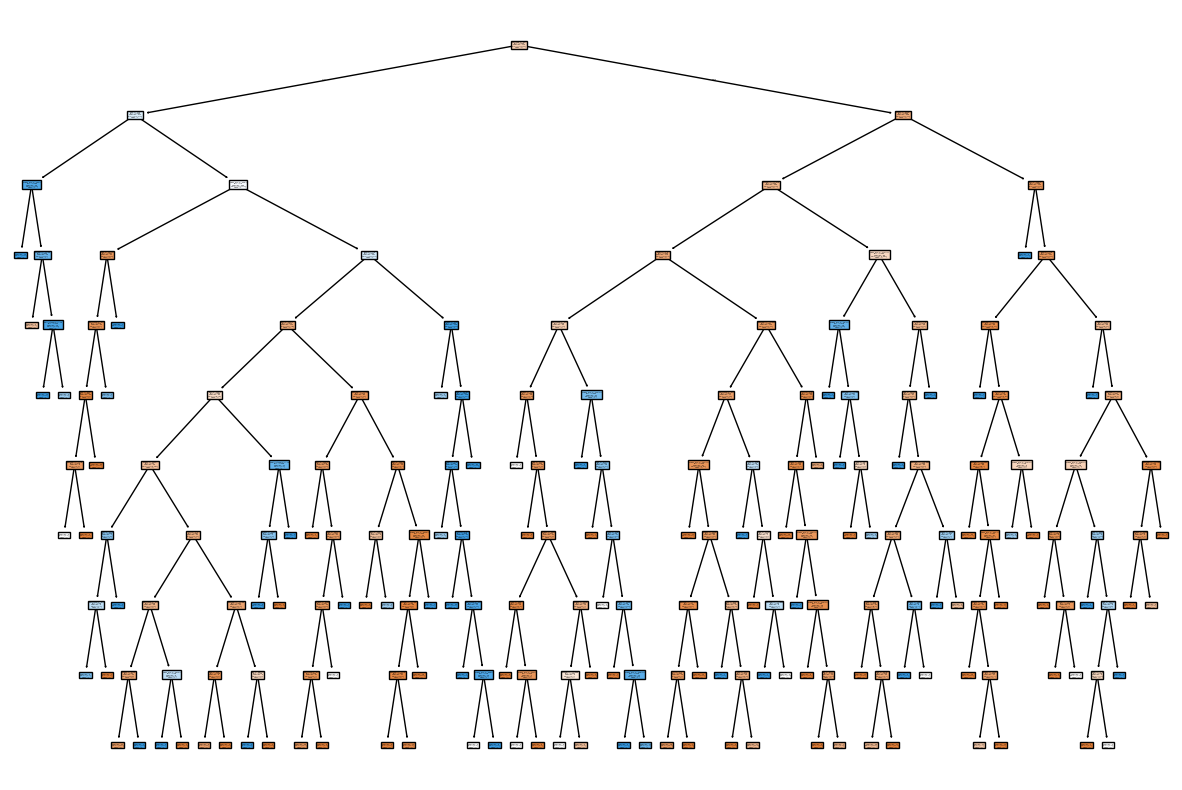

In [ ]:
# Plot the tree
fig = plt.figure(figsize=(15,10))
tree.plot_tree(dtc, feature_names=feature_names, class_names=class_names, filled=True)
fig.savefig('decision_tree.png')
plt.show()


In [ ]:
fig.savefig("decistion_tree_train.png")

Visualize the Decision Tree on Testing Data

In [ ]:
clf_test = DecisionTreeClassifier(random_state=1234)
dt_test = clf_test.fit(X_test, y_test)
text_representation = tree.export_text(clf_test)
print(text_representation)

|--- feature_7 <= 0.50
|   |--- feature_4 <= 26.14
|   |   |--- feature_1 <= 885.00
|   |   |   |--- feature_1 <= 860.00
|   |   |   |   |--- feature_3 <= 44.50
|   |   |   |   |   |--- feature_11 <= 146.76
|   |   |   |   |   |   |--- feature_1 <= 201.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  201.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_11 >  146.76
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  44.50
|   |   |   |   |   |--- feature_3 <= 54.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_3 >  54.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  860.00
|   |   |   |   |--- feature_11 <= 396.63
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_11 >  396.63
|   |   |   |   |   |--- class: 1
|   |   |--- feature_1 >  885.00
|   |   |   |--- class: 1
|   |--- feature_4 >  26.14
|   |   |--- feature_10 <= 30.35
|   |   |   |-

Visualize the Decision Tree on overall Data

In [ ]:
with open("decistion_tree_test.log", "w") as fout:
 fout.write(text_representation)

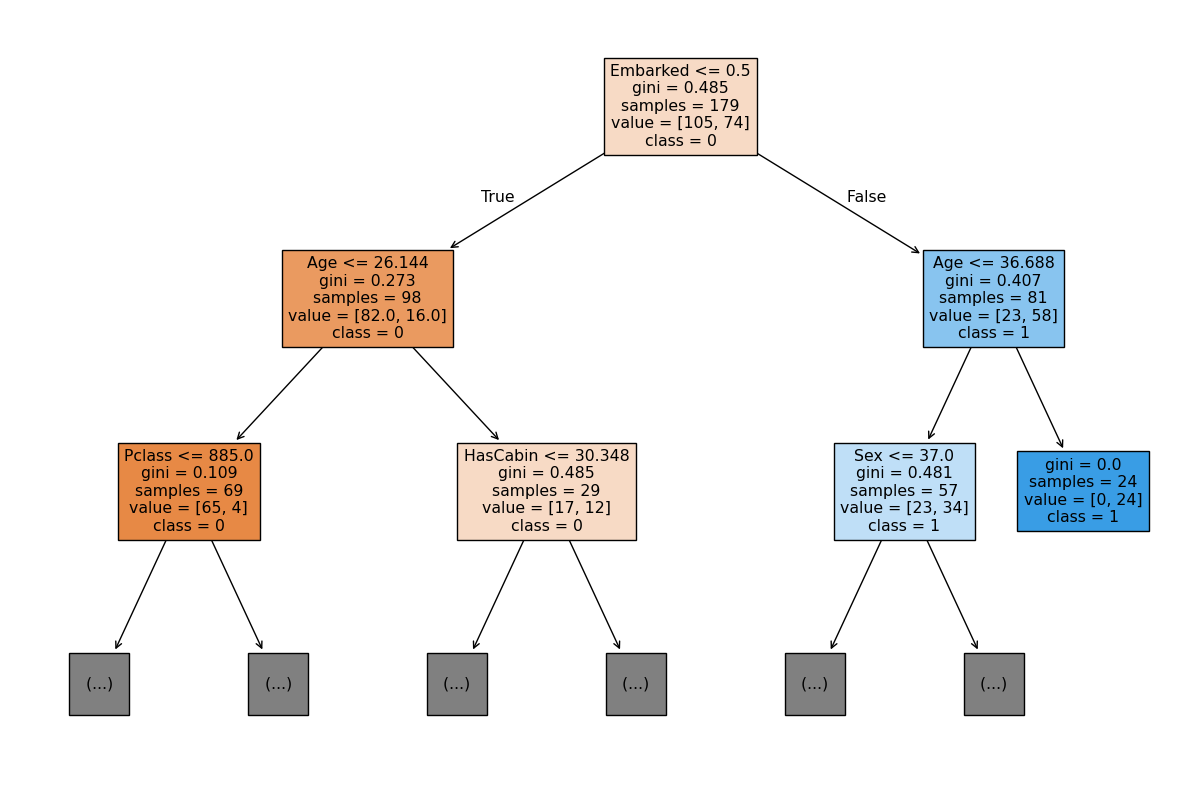

In [ ]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(clf_test, feature_names=feature_names, class_names=class_names,filled=True,max_depth = 2)
fig.savefig('imagename1.png')

fig.savefig("decistion_tree_test.png")

In [ ]:
clf = DecisionTreeClassifier(random_state=1234)
dt = clf.fit(X, y)
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_7 <= 0.50
|   |--- feature_5 <= 121.50
|   |   |--- feature_5 <= 113.50
|   |   |   |--- feature_1 <= 138.00
|   |   |   |   |--- feature_1 <= 74.00
|   |   |   |   |   |--- feature_3 <= 59.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_3 >  59.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  74.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  138.00
|   |   |   |   |--- feature_4 <= 29.10
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  29.10
|   |   |   |   |   |--- feature_11 <= 862.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_11 >  862.00
|   |   |   |   |   |   |--- feature_4 <= 35.25
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_4 >  35.25
|   |   |   |   |   |   |   |--- feature_11 <= 1001.45
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_11 >  1001.45
|   |   |   |   |   |   |

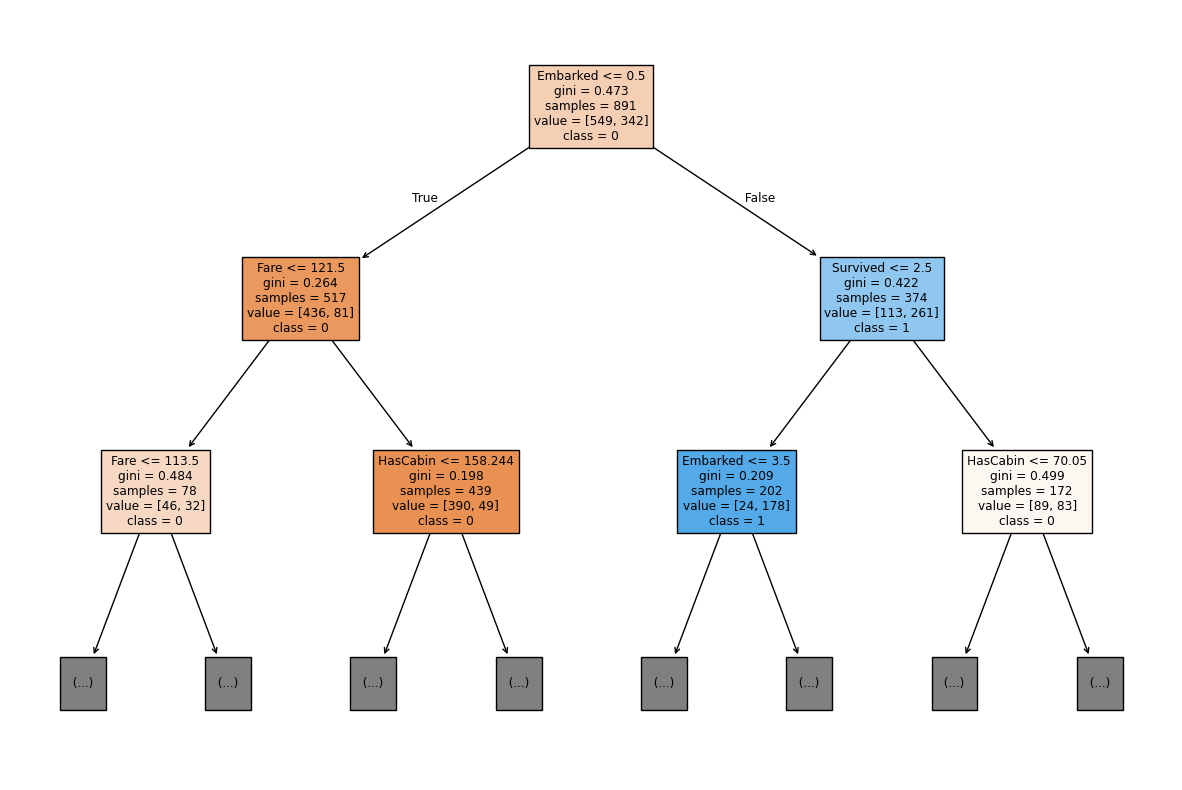

In [ ]:
# Write the textual representation of the tree to a log file
with open("decision_tree.log", "w") as fout:
    fout.write(text_representation)

# Plot the decision tree
fig = plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True, max_depth=2)

# Save the image of the decision tree
fig.savefig('decision_tree_image.png')

# Show the plot
plt.show()

In [ ]:
------------------------------------------------------------------  THE END  --------------------------------------------------------------------